# Second lecture of laboratory of math and statistic for AI

In [60]:
import pandas as pd
import numpy as np

# Load data into memory
data = pd.read_csv('data.csv')
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

### Convert data into a matrix

In [61]:
data=np.array(data)#now this is a matrix
print(data.shape)

(42000, 785)


Dataset of 42000 observations of 28*28 dimensions. images can be convrted to matrix. Each elemet of this matrix is the gradation of color of the pixel.

We now to some flattering. The rows are concatwenated together. Each elemement of the vector is a matrix of 28*28.-> 784 dimensional vector. The first element is the label, so we have a vector of 785.  

Split data into a matrix x and a vector y where:
1. X is a dimension (42000,784)
1. Y is dimension (42000,)
1. Y is the first column of data while X is the rest

Now we will have to recreate the matrix of each x_i

In [62]:
X=data[:,1:]#42000 i the numer of rows
Y=data[:,0]
print(X.shape,Y.shape)


(42000, 784) (42000,)


This is N * d but we want d * N

In [63]:
X=data[:,1:] #42000 i the numer of rows
X=X.T
Y=data[:,0]
print(X.shape,Y.shape)

(784, 42000) (42000,)


Now we have d*N. Now how can we see images in Python?

In [64]:
import matplotlib.pyplot as plt

### load an image in memory


In [65]:
indx=10
img=X[:,indx]
img=np.reshape(img,(28,28))


### Visualize now

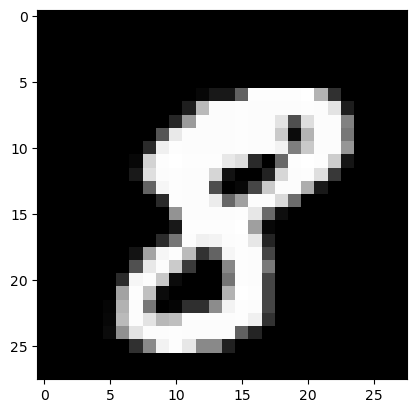

8


In [66]:
plt.imshow(img,cmap="gray")
plt.show()
print(Y[indx])

 We can't use the same dataset in training and in the testing. Nevr do that. CauseYou won't understant if the machine is learning. We devide the dataset in two parts. The first to train, the second to tesing. Wich i the percentage of accuracy of the machine. 

We want to create a function implementi the splitting that takes as imput a dataset X,Y and an integer Ntrain and returns four arrays :
1. XTrain is composed ty Ntrain random samples from X
1. ytrain and test accordingly
2. Xtest is the test of the array X
3. Limitation: The sample hat to be random

numpy.random.shuffle. You havw to shuffle only the columns.

Generate a vector ind=[0,N-1], then shuffle the vector idx and then exract from X and Y the elements corresponding to ind[:Ntrain] if you apply shuffle to X it will shuffle the rows.

    

In [74]:
def train(X,Y,Ntrain):
    ind=np.linspace(0,X.shape[1]-1,X.shape[1],dtype=int)
    #ind = np.arange(0,X.shape[1]-1)
    np.random.shuffle(ind)
    Xtrain=np.zeros((X.shape[0],Ntrain))
    Ytrain=np.zeros((Ntrain,))
    print(ind)
    for i in range(Ntrain):
        Xtrain[:,i]=X[:,ind[i]]
        Ytrain[i]=Y[ind[i]]
    return (Xtrain,Ytrain)

train(X,Y,30)

[27215 40158 18316 ... 24454  4769 24418]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1., 4., 9., 3., 4., 3., 6., 1., 4., 9., 0., 0., 4., 2., 6., 6., 3.,
        9., 2., 6., 8., 2., 6., 4., 9., 2., 7., 4., 2., 7.]))

In [77]:
def train2(X,Y,Ntrain):
    ind=np.linspace(0,X.shape[1]-1,X.shape[1],dtype=int)
    ind = np.arange(0,X.shape[1]-1)
    np.random.shuffle(ind)
    Xtrain=X[:,ind[:Ntrain]]
    Ytrain=Y[:ind[:Ntrain]]
    return(Xtrain,Ytrain)

train(X,Y,30)

[24391 38950 39678 ... 32140 34800 16259]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([7., 3., 1., 9., 3., 1., 9., 5., 8., 6., 6., 1., 8., 2., 5., 7., 7.,
        6., 9., 5., 9., 6., 3., 3., 0., 7., 5., 7., 8., 1.]))

In [85]:
def split_data(X,Y,Ntrain):
    d,N=X.shape
    indx=np.arange(N)
    np.random.shuffle(indx)
    train_indx=indx[:Ntrain]
    test_indx=indx[Ntrain:]
    Xtrain=X[:,train_indx]
    Ytrain=Y[train_indx]
    Xtest=X[:,test_indx]
    Ytest=Y[test_indx]
    
    return(Xtrain,Ytrain),(Xtest,Ytest)

print(split_data(X,Y,30000))

    

TypeError: tuple indices must be integers or slices, not tuple